In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from sklearn import decomposition as dcp

# Part 1: How does PCA work?

We use here a subset of the McDonald's dataset seen in class: we have retained only three of the features [Vitamin C, Total Fat, Cholesterol] to better understand how PCA works.


In [2]:
menu=pd.read_csv("McDonaldsMenu.csv")

1. Visualize the header of the dataframe and make sure there are no empty values.

In [3]:
menu.head().T

,0,1,2,3,4
Category,Breakfast,Breakfast,Breakfast,Breakfast,Breakfast
Item,Egg McMuffin,Egg White Delight,Sausage McMuffin,Sausage McMuffin with Egg,Sausage McMuffin with Egg Whites
Vitamin C,0,0,0,0,0
Total Fat,20,12,35,43,35
Cholesterol,87,8,15,95,16


In [4]:
menu.isnull().sum()

Category       0
Item           0
Vitamin C      0
Total Fat      0
Cholesterol    0
dtype: int64

In [33]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     260 non-null    object
 1   Item         260 non-null    object
 2   Vitamin C    260 non-null    int64 
 3   Total Fat    260 non-null    int64 
 4   Cholesterol  260 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 10.3+ KB


2. What is the variance of each feature? Use `menu.cov()` to find this. Which variable has highest variance? Which variable has lowest variance?

- highest var = cholesterol
- lowest var = total fat

In [5]:
menu.cov()

,Vitamin C,Total Fat,Cholesterol
Vitamin C,694.087600,-51.518681,-63.855331
Total Fat,-51.518681,478.961925,433.180814
Cholesterol,-63.855331,433.180814,846.324265


3. If we add the variance of each feature, how much do we get? What is the ratio variance/total dataset variance for each feature? How low does this go?

In [22]:
menu.var()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Vitamin C      694.087600
Total Fat      478.961925
Cholesterol    846.324265
dtype: float64

In [14]:
menu.var().sum()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


2019.3737897237966

In [15]:
menu.var()/menu.var().sum()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Vitamin C      0.343714
Total Fat      0.237183
Cholesterol    0.419102
dtype: float64

In [16]:
min(menu.var()/menu.var().sum())

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0.23718339170255173

4. We now consider a linear transformation of the variables that we give below. We obtain a new dataframe with three features `z1`, `z2`, and `z3`. Visualize the header of this matrix and obtain its covariance matrix. What is the variance of each feature? What is the sum of all three variances?

In [17]:
df=pd.DataFrame()

#creating centered variables
Vit_C_centered=menu["Vitamin C"]-menu["Vitamin C"].mean()
Total_Fat_centered=menu["Total Fat"]-menu["Total Fat"].mean()
Cholesterol_centered=menu["Cholesterol"]-menu["Cholesterol"].mean()

df["Category"]=menu["Category"]
df["Item"]=menu["Item"]
df["z1"]=-0.17718634*Vit_C_centered+0.54454878*Total_Fat_centered+0.81979975*Cholesterol_centered
df["z2"]=0.98405437*Vit_C_centered+0.08485918*Total_Fat_centered+0.15631992*Cholesterol_centered
df["z3"]=0.01555629*Vit_C_centered+0.83442528*Total_Fat_centered-0.5509149*Cholesterol_centered

In [19]:
df.cov()

,z1,z2,z3
z1,1.147864e+03,7.440345e-07,-0.012614
z2,7.440345e-07,6.795013e+02,-0.001424
z3,-1.261391e-02,-1.424010e-03,192.011090


In [20]:
df.var()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


z1    1147.864221
z2     679.501320
z3     192.011090
dtype: float64

In [21]:
df.var().sum()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


2019.3766304577252

5. What is the variance of `z3` relative to the total variance? Would you feel comfortable dropping `z3`?

In [23]:
df.var()/df.var().sum()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


z1    0.568425
z2    0.336491
z3    0.095084
dtype: float64

# Part 2: Understanding what Python outputs when using PCA

We are going to see what commands lead to what output in Python. We use the scikit-learn decomposition library for PCA.

In [24]:
from sklearn import decomposition as dcp

We then also have to drop the Item column of menu as PCA only works on numerical data.

In [25]:
menu=pd.read_csv("McDonaldsMenu.csv")
menu_num=menu.drop(columns=["Item", "Category"])

We now fit the PCA transform to the data. Note that we have 3 "old" variables. Here, we are specifying that we want 3 new variables from the three old ones.

In [26]:
pca=dcp.PCA(n_components=3)
pca.fit(menu_num)

PCA(n_components=3)

1. Run the code below. Do you recognize its output? Where have you seen these numbers before during this class?

In [27]:
pca.components_

array([[-0.17718634,  0.54454878,  0.81979975],
       [ 0.98405437,  0.08485918,  0.15631992],
       [ 0.01555629,  0.83442528, -0.55090149]])

2. Run the code below. Again, do you recognize its output?

In [28]:
pca.explained_variance_

array([1147.86421744,  679.5013194 ,  192.00825288])

3. Run the code below. Again, do you recognize its output? What does it correspond to?

In [29]:
pca.explained_variance_ratio_

array([0.56842583, 0.33649111, 0.09508307])

In [30]:
pca.explained_variance_ratio_.sum()

1.0

4. Run the code below. What do you obtain here?

In [31]:
data_pca = pca.fit_transform(menu_num)
data_pca

array([[ 5.67682206e+01,  2.17217159e+00, -3.94436500e+01],
       [-1.23523497e+01, -1.08559758e+01, -2.59783416e+00],
       [ 5.91087054e+00, -7.80997522e+00,  1.27376368e+01],
       [ 7.58512405e+01,  5.37449206e+00, -2.46590806e+01],
       [ 6.73067029e+00, -7.65365530e+00,  1.21867353e+01],
       [ 7.57840251e+01,  7.53018617e+00, -3.32234524e+01],
       [ 6.29625065e+01,  1.11165104e+01, -2.04270881e+01],
       [ 6.67743479e+01,  1.17105246e+01, -1.45861112e+01],
       [-4.19465537e-01, -8.17397491e-01,  1.25624173e+01],
       [ 2.84782715e+00, -3.08242426e-01,  1.75689689e+01],
       [ 5.62371327e+00, -7.99756059e+00,  2.13331212e+01],
       [ 8.89100596e+00, -7.48840553e+00,  2.63396729e+01],
       [ 6.98254850e+01,  4.09266722e+00, -1.22072857e+01],
       [ 7.36373265e+01,  4.68668147e+00, -6.36630873e+00],
       [ 6.44351302e+00, -7.84124067e+00,  2.07822197e+01],
       [ 1.02553545e+01, -7.24722643e+00,  2.66231967e+01],
       [-7.20696005e-01, -6.96290281e+00

In [34]:
len(data_pca)

260

# Part 3: Considering a much larger dataset with more features

This dataset is the dataset from above with additional features added: all of these correspond to quantity of an element present in the item as a percentage of the daily intake.

In [35]:
menu=pd.read_csv("McDonaldsMenu_morefeatures.csv")
menu.head()

,Category,Item,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Calcium,Iron,Vitamin C
0,Breakfast,Egg McMuffin,20,25,87,31,10,17,10,25,15,0
1,Breakfast,Egg White Delight,12,15,8,32,10,17,6,25,8,0
2,Breakfast,Sausage McMuffin,35,42,15,33,10,17,8,25,10,0
3,Breakfast,Sausage McMuffin with Egg,43,52,95,36,10,17,15,30,15,0
4,Breakfast,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,25,10,0


1. Drop the columns "Item" and "Category" using `.drop(columns=["Item","Category"]` to obtain a purely numerical dataset.

In [38]:
menu_num = menu.drop(columns=["Item", "Category"])

2. Similarly to above, run pca on the dataset obtained with `n_components=10`

In [39]:
from sklearn import decomposition as dcp
pca=dcp.PCA(n_components=10) #number of components we keep: here we have three features and we are asking for three new variables out of the old variables
pca.fit(menu_num)

PCA(n_components=10)

3. What are the explained variance ratios?

In [40]:
pca.explained_variance_ratio_

array([0.46846089, 0.17496823, 0.14112873, 0.09299599, 0.06924932,
       0.03351428, 0.00917541, 0.00442827, 0.00427006, 0.00180882])

4. Using the code below, plot the **cumulative** explained variance ratio. One rule of thumb is to take enough components such that 50% of the variance is explained:

In [41]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum

array([0.46846089, 0.64342912, 0.78455785, 0.87755384, 0.94680317,
       0.98031744, 0.98949285, 0.99392112, 0.99819118, 1.        ])

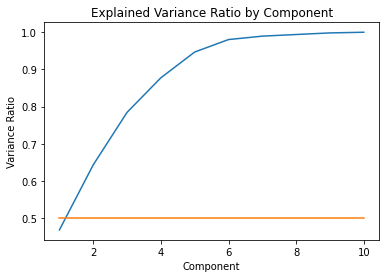

In [42]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,11),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,10],[0.5,0.5])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

5. How many components would you use based on this?

depending on the cumulative variance

6. Look at the explained variance using `.explained_variance_`. Is there a large drop at some point? This can also be a good rule of thumb for picking a good number of features (if the data is normalized, a variance cut-off of 1 would be a more precise rule of thumb)

In [43]:
pca.explained_variance_

array([1968.39225676,  735.18647385,  592.99870603,  390.75320765,
        290.97377369,  140.82124285,   38.55348857,   18.60681895,
         17.94206417,    7.60034734])

There is a large drop between one component and two, as well as between 5 components and 6.

7. Use the code below to draw an "elbow plot". This allows the task above to be done more systematically: the idea of the plot is to show you directly how much you still gain by adding more components. If there is a significant kink, that gives you an idea that you want to stop adding components.

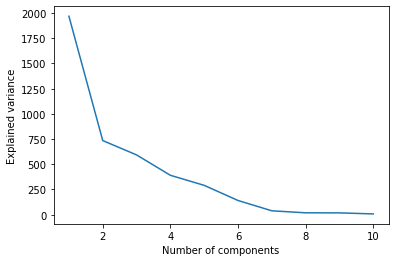

In [44]:
plt.plot(np.arange(1,11),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

8. We use 2 components moving forward (i.e., we are going to replace the 10 factors by simply 2). Use the code below to look at the loadings for the five new variables. Is it easy to interpret?

In [45]:
loadings=pd.DataFrame(pca.components_[0:2,:].T).set_index(np.arange(1,11))
loadings.columns = ['z1','z2']
loadings.index = menu_num.columns
loadings

,z1,z2
Total Fat,0.414338,0.033307
Saturated Fat,0.525428,-0.105464
Cholesterol,0.557168,0.100597
Sodium,0.413492,0.154635
Carbohydrates,0.094416,-0.024719
Dietary Fiber,0.077305,0.087498
Vitamin A,0.080840,0.325466
Calcium,0.113909,-0.168236
Iron,0.154527,0.069144
Vitamin C,-0.112065,0.898030


9. It can be very difficult to see here what each feature represents if there are too many features. To resolve this issue, we instead use `dcp.SparsePCA` which does the following: it attempts to find a compromise between being close to the "true" PCA components and only selecting one feature for each component. This is controlled by a parameter `alpha` that can be tuned. Run the code below for `alpha=0`, `alpha=5`, and `alpha=20`. Can you see what is happening?

In [46]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=2)
pca_sparse.fit(menu_num)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,11))
loadings_sparse.columns = ['z1','z2']
loadings_sparse.index = menu_num.columns
loadings_sparse

,z1,z2
Total Fat,-0.416513,0.024076
Saturated Fat,-0.512292,0.174011
Cholesterol,-0.568412,0.000000
Sodium,-0.428282,-0.064503
Carbohydrates,-0.085847,0.024817
Dietary Fiber,-0.080337,-0.058937
Vitamin A,-0.108185,-0.276924
Calcium,-0.086985,0.171721
Iron,-0.156403,-0.027591
Vitamin C,0.000000,-0.924096


10. Finally, we will match our components to the menu items. The code below is used to generate a dataframe that contains four columns : Item, Category and the two first components created via the "standard" PCA:

In [47]:
data_pca = pca.fit_transform(menu_num)

df=pd.DataFrame()
df["Item"]=menu["Item"]
df["Category"]=menu["Category"]
df["z1"]=data_pca[:, 0].reshape(-1)
df["z2"]=data_pca[:,1].reshape(-1)
df

,Item,Category,z1,z2
0,Egg McMuffin,Breakfast,42.427732,1.183941
1,Egg White Delight,Breakfast,-11.149091,-7.606257
2,Sausage McMuffin,Breakfast,17.351623,-8.039691
3,Sausage McMuffin with Egg,Breakfast,73.642595,1.466572
4,Sausage McMuffin with Egg Whites,Breakfast,19.401078,-7.971486
...,...,...,...,...
254,McFlurry with Oreo Cookies (Small),Smoothies & Shakes,7.998526,-13.839585
255,McFlurry with Oreo Cookies (Medium),Smoothies & Shakes,26.208344,-13.921793
256,McFlurry with Oreo Cookies (Snack),Smoothies & Shakes,-11.477986,-12.873513
257,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,43.965216,-16.748407


11. Plot a scatter plot of z2 as a function of z1, with the hue of the points being determined by the category.

# Exercise: other applications of PCA - understanding what it means to compress an image

Please install the `pillow` library (for image reading and editing) before starting this exercise. Then restart the kernel and proceed with the exercise.

In [ ]:
conda install -c anaconda pillow

In [ ]:
from PIL import Image, ImageOps

We'll be using a high-resolution photo of Nice, France, a favorite among British tourists:

Picture credit: Photo by <a href="https://unsplash.com/@florielaure?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Caudron Florie Laure</a> on <a href="https://unsplash.com/s/photos/france-nice?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

In [ ]:
img = Image.open('Nice.jpg')

1. Take a look at the image by running the code below --- isn't Nice gorgeous??

In [ ]:
img

For those of you who have a little photography knowledge, you'll know that any image is made up of *pixels* and each pixel is represented as a color via a triple (R,G,B) corresponding to the amount of Red, Green, and Blue in the pixel. This is a bit complex for us for the example so we will convert the image to grayscale so we only have one number per pixel (the amount of gray). To do this, we will use `.grayscale`.

In [ ]:
img_gray=ImageOps.grayscale(img)

In [ ]:
img_gray

2. We can thus obtain a representation of the image via an array of numbers: this array is the same size as the number of pixels in the photo and contains numbers from 0 to 255, with 0 being white and 255 being black. Run the code below to obtain the aforementioned array. What is the shape of the array? Look at the properties of the picture - what do these numbers correspond to? How many numbers does the computer have to store to store this image?

In [ ]:
array_gray=np.array(img_gray)

In [ ]:
array_gray.shape

In [ ]:
array_gray.size

This corresponds to the size of the picture (3778 pixels by 3024). The computer has to store 3778 * 3024 numbers, i.e., 11,424,672 numbers.

3. Our goal is to apply PCA to the picture to understand how image compression works. Fit the PCA transform with no limits on the number of components to the data `array_gray` (this may take a couple of seconds to compute).

In [ ]:
pca=dcp.PCA()
pca.fit(array_gray)

4. What is the size of the array returned by `pca.explained_variance_ratio_`? If we were to view `array_gray` as a dataframe, how many observations would there be? How many features? Does the size of the array then make sense?

5. Build an array containing the cumulative sum of the explained variance ratio. Plot this array as a function of the number of components. What do you observe?

6. If you wanted to explain 95% of the variance, how many components should you keep? What if you wanted to keep 99% of the variance? Use `np.where`.

We would keep the first 105 components for 95% and 434 for 99%.

7. Rerun PCA with a number of components equal to 105. Obtain the array corresponding to the scores and set it equal to `scores`. What is the shape of `scores`?

8. We know from lecture that scores contains 105 new features (with each feature containing 3778 observations). For one given observation (i.e., if we look at a row of `scores`), we have for example that $z_1$, the first new feature (i.e., the first column of `scores`), is equal to a linear combination of the old features (which have been centered):
$$z_1=a_{11} (x_1-mean_{feature 1})+...+a_{1n} (x_n-mean_{feature n})$$
It is possible, to go the other direction as well: rewrite all these equalities that we have in such a way that $x_1,...,x_n$ are written as a linear combination of the new features $z_1,...,z_n$ and the loadings $a_{11},...,a_{1n},...., a_{nn}$. 
This is what the `.inverse_transform` function does when applied to `scores`. Give it a try and let `new_image` be the result. What is the shape of `new_image`?

9. To obtain this array (that has exactly the same size as the previous image), we only need know the scores, the loadings, and the means. How many numbers does this constitute? Compare this to the number of numbers we had to retain for `array_gray`.

We are only retaining 6% of the total number of numbers!

10. We now plot `new_image`: this requires a couple of manipulations. Indeed, a quick check shows us that `new_image` contains numbers that are not integers between 0 and 255. We need to rescale the matrix to obtain only numbers betwen 0 and 255. Run the following code and look at the image. Can you tell the difference with the first image?

11. If you are not satisfied with the quality of the picture, rerun the same process with a number of components equal to 434. How many numbers are you storing here?

12. Do you understand why this is called image compression? Explain why companies such as Facebook or Instagram would find image compression very valuable.